<a href="https://colab.research.google.com/github/vananya19/fmml_aiml_lab_and_projects/blob/main/module4AI_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
# You don't need to understand these functions


def plotGrid(transform, unit, linestyle=":", fig=None, ax=None):
    lim1 = -100
    lim2 = 100

    def mat2xy(start, end):
        if len(start.shape) == 1:
            start = np.expand_dims(start, 0)
            end = np.expand_dims(end, 0)
        nan = np.ones(len(start)) * np.nan
        x = np.stack((start[:, 0], end[:, 0], nan)).T.reshape(-1)
        y = np.stack((start[:, 1], end[:, 1], nan)).T.reshape(-1)
        return x, y

    def parallellines(axis, addend, lines, unit):
        addend = np.repeat(np.expand_dims(addend, 0), lines * 2, 0)
        unit = np.expand_dims(np.arange(-lines, lines) * unit, 1)
        unit = unit - lines
        addend = addend * unit
        lines = np.expand_dims(axis, 0) + addend
        return np.concatenate((lines, lines * -1))

    if fig is None:
        fig, ax = plt.subplots(figsize=(5, 5))
    transform = transform.astype(float)
    xaxis = transform[0]
    yaxis = transform[1]

    # plot lines parallel to the x axis
    lines1 = parallellines(xaxis * lim1, yaxis, 100, unit)
    lines2 = parallellines(xaxis * lim2, yaxis, 100, unit)
    x, y = mat2xy(lines1, lines2)
    plt.plot(x, y, linestyle + "k", linewidth=0.5)
    # plot x axis
    x, y = mat2xy(xaxis * lim1, xaxis * lim2)
    plt.plot(x, y, linestyle, color="#440077")

    # plot  lines parallel to the y axis
    lines1 = parallellines(yaxis * lim1, xaxis, 100, unit)
    lines2 = parallellines(yaxis * lim2, xaxis, 100, unit)
    x, y = mat2xy(lines1, lines2)
    plt.plot(x, y, linestyle + "k", linewidth=0.5)
    # plot y axis
    x, y = mat2xy(yaxis * lim1, yaxis * lim2)
    plt.plot(x, y, linestyle, color="#aa5500")

    return fig, ax


def plotData(X, y, xlabel="hole", ylabel="bound", fig=None, ax=None):
    if fig is None:
        fig, ax = plt.subplots()
    for ii in range(nclasses):
        plt.scatter(X[y == ii, 0], X[y == ii, 1])
    plt.legend([str(i) for i in range(nclasses)])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    lim2 = X.max()
    lim1 = X.min()
    return fig, ax

In [4]:
T0 = np.array([[1, 0], [0, 3]])
T1 = np.array([[1, 0], [-1, 2]])

data1 = np.array([5, 4])  # the data in T1 coordinate system
data0 = np.matmul(T1, data1)  # the data in T0 coordinate system

print("Data in T0 = ", data0)
print("Data in T1 = ", data1)

Data in T0 =  [5 3]
Data in T1 =  [5 4]


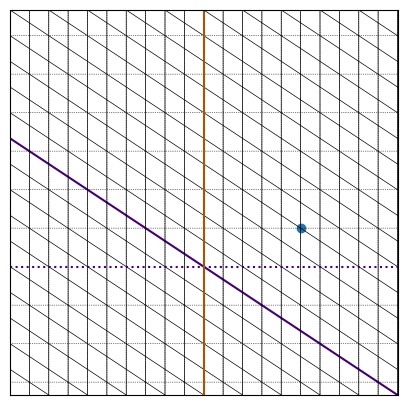

In [7]:
fig, ax = plotGrid(T1.T, 1, "-")
plotGrid(T0.T, 1, fig=fig, ax=ax)

plt.scatter(data0[0], data0[1])
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 20)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [8]:
data0_a = np.matmul(T1, data1)
data0_b = np.matmul(data1, T1.T)
print(data0_a)
print(data0_b)

[5 3]
[5 3]


In [13]:
#let us define 3 points in T1
A1 = np.array([13, 3])
B1 = np.array([2, -15])
C1 = np.array([1, -10])

# the corresponding points in T0:
A0 = np.matmul(T1, A1)
B0 = np.matmul(T1, B1)
C0 = np.matmul(T1, C1)


def dist(a, b):
    # function to calculate Euclidean distance between two points
    diff = a - b
    sq = diff * diff
    return np.sqrt(sq.sum())


# distance between the points in T1
print("Distance between A and B in T1 = ", dist(A1, B1))
print("Distance between B and C in T1 = ", dist(B1, C1))
print("Distance between A and C in T1 = ", dist(A1, C1))

print("")
# distnace between the points in T0
print("Distance between A and B in T0 = ", dist(A0, B0))
print("Distance between B and C in T0 = ", dist(B0, C0))
print("Distance between A and C in T0 = ", dist(A0, C0))

Distance between A and B in T1 =  21.095023109728988
Distance between B and C in T1 =  5.0990195135927845
Distance between A and C in T1 =  17.69180601295413

Distance between A and B in T0 =  27.313000567495326
Distance between B and C in T0 =  11.045361017187261
Distance between A and C in T0 =  18.439088914585774


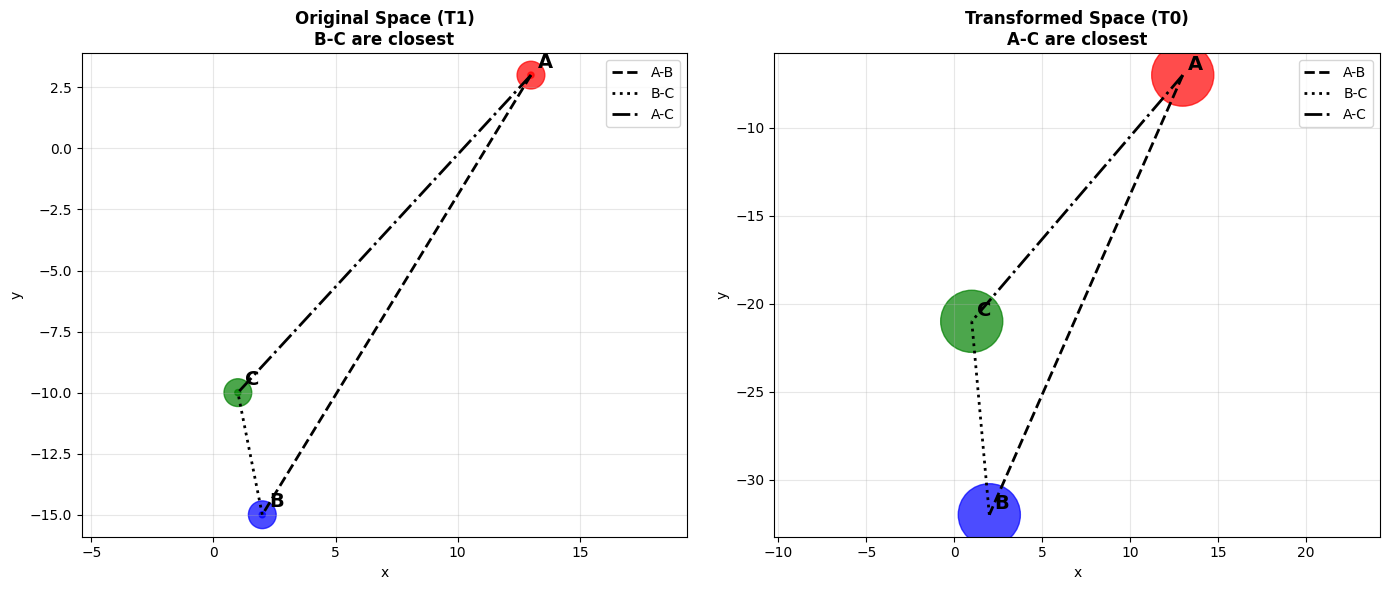

DISTANCE COMPARISON SUMMARY

In T1 Space:
  A-B distance: 21.10
  B-C distance: 5.10 ← SHORTEST
  A-C distance: 17.69

In T0 Space (after transformation):
  A-B distance: 27.31
  B-C distance: 11.05
  A-C distance: 18.44 ← SHORTEST

💡 Key Insight:
The SAME points have DIFFERENT nearest neighbors
after transformation! This directly affects K-NN predictions.


In [16]:
# Visualize how transformation changes point relationships
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot in T1 (original space)
ax1.scatter([A1[0], B1[0], C1[0]], [A1[1], B1[1], C1[1]],
            s=20, c=['red', 'blue', 'green'], alpha=0.7)
ax1.plot([A1[0], B1[0]], [A1[1], B1[1]], 'k--', linewidth=2, label='A-B')
ax1.plot([B1[0], C1[0]], [B1[1], C1[1]], 'k:', linewidth=2, label='B-C')
ax1.plot([A1[0], C1[0]], [A1[1], C1[1]], 'k-.', linewidth=2, label='A-C')
ax1.scatter([A1[0], B1[0], C1[0]], [A1[1], B1[1], C1[1]],
            s=400, c=['red', 'blue', 'green'], alpha=0.7)
ax1.text(A1[0]+0.3, A1[1]+0.3, 'A', fontsize=14, fontweight='bold')
ax1.text(B1[0]+0.3, B1[1]+0.3, 'B', fontsize=14, fontweight='bold')
ax1.text(C1[0]+0.3, C1[1]+0.3, 'C', fontsize=14, fontweight='bold')
ax1.set_title('Original Space (T1)\nB-C are closest', fontsize=12, fontweight='bold')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.axis('equal')

# Plot in T0 (transformed space)
ax2.scatter([A0[0], B0[0], C0[0]], [A0[1], B0[1], C0[1]],
            s=2000, c=['red', 'blue', 'green'], alpha=0.7)
ax2.plot([A0[0], B0[0]], [A0[1], B0[1]], 'k--', linewidth=2, label='A-B')
ax2.plot([B0[0], C0[0]], [B0[1], C0[1]], 'k:', linewidth=2, label='B-C')
ax2.plot([A0[0], C0[0]], [A0[1], C0[1]], 'k-.', linewidth=2, label='A-C')
ax2.text(A0[0]+0.3, A0[1]+0.3, 'A', fontsize=14, fontweight='bold')
ax2.text(B0[0]+0.3, B0[1]+0.3, 'B', fontsize=14, fontweight='bold')
ax2.text(C0[0]+0.3, C0[1]+0.3, 'C', fontsize=14, fontweight='bold')
ax2.set_title('Transformed Space (T0)\nA-C are closest', fontsize=12, fontweight='bold')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.axis('equal')

plt.tight_layout()
plt.show()

# Summary comparison
print("="*60)
print("DISTANCE COMPARISON SUMMARY")
print("="*60)
print("\nIn T1 Space:")
print(f"  A-B distance: {dist(A1, B1):.2f}")
print(f"  B-C distance: {dist(B1, C1):.2f} ← SHORTEST")
print(f"  A-C distance: {dist(A1, C1):.2f}")

print("\nIn T0 Space (after transformation):")
print(f"  A-B distance: {dist(A0, B0):.2f}")
print(f"  B-C distance: {dist(B0, C0):.2f}")
print(f"  A-C distance: {dist(A0, C0):.2f} ← SHORTEST")

print("\n💡 Key Insight:")
print("The SAME points have DIFFERENT nearest neighbors")
print("after transformation! This directly affects K-NN predictions.")
print("="*60)

In [17]:
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features

    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel


def Accuracy(gtlabel, predlabel):
    """
    This function takes in the ground-truth labels and predicted labels
    and returns the accuracy of the classifier

    gtlabel: numpy array of shape (n,) where n is the number of samples
    predlabel: numpy array of shape (n,) where n is the number of samples

    returns: the accuracy of the classifier which is the number of correct predictions divided by the total number of predictions
    """
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)


def cumArray(img):
    img2 = img.copy()
    for ii in range(1, img2.shape[1]):
        # for every row, add up all the rows above it.
        img2[ii, :] = img2[ii, :] + img2[ii - 1, :]
    img2 = img2 > 0
    return img2


def getHolePixels(img):
    """
    This function takes in a binary image and returns the pixels that are holes in the image

    img: numpy array of shape (n,m) where n is the height of the image and m is the width of the image

    returns: a binary image of the same shape as the input image where the holes are filled in
    """
    im1 = cumArray(img)
    # rotate and cumulate it again for differnt direction
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    # this will create a binary image with all the holes filled in.
    hull = im1 & im2 & im3 & im4
    # remove the original digit to leave behind the holes
    hole = hull & ~(img > 0)
    return hole


def getHullPixels(img):
    """
    This function takes in a binary image and returns the pixels that are the convex hull of the image

    img: numpy array of shape (n,m) where n is the height of the image and m is the width of the image

    returns: a binary image of the same shape as the input image where the convex hull is filled in
    """
    im1 = cumArray(img)
    # rotate and cumulate it again for differnt direction
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    # this will create a binary image with all the holes filled in.
    hull = im1 & im2 & im3 & im4
    return hull


def minus(a, b):
    """
    This function takes in two binary images and returns the difference between the two images
    """
    return a & ~b


def getBoundaryPixels(img):
    """
    This function takes in a binary image and returns the pixels that are the boundary of the image

    img: numpy array of shape (n,m) where n is the height of the image and m is the width of the image

    returns: a binary image of the same shape as the input image where the boundary is filled in
    """
    img = img.copy() > 0  # binarize the image
    rshift = np.roll(img, 1, 1)
    lshift = np.roll(img, -1, 1)
    ushift = np.roll(img, -1, 0)
    dshift = np.roll(img, 1, 0)
    boundary = (
        minus(img, rshift)
        | minus(img, lshift)
        | minus(img, ushift)
        | minus(img, dshift)
    )
    return boundary

In [22]:
# loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255
test_X = test_X / 255

nclasses = 4

# get only for the first 4 classes
train_X = train_X[train_y < nclasses]
train_y = train_y[train_y < nclasses]
test_X = test_X[test_y < nclasses]
test_y = test_y[test_y < nclasses]

# We are only taking a subset of the training set
train_X = train_X[::100].copy()
train_y = train_y[::100].copy()  # do the same to the labels

# taking a subset of the test set. This code takes every 500th sample
test_X = test_X[::100].copy()
test_y = test_y[::100].copy()

In [24]:
test_pred = NN(train_feats, train_y, test_feats)
acc = Accuracy(test_y, test_pred)
print("Baseline accuracy:", acc*100, "%", "for", nclasses, "classes")

Baseline accuracy: 76.19047619047619 % for 4 classes


In [ ]:
# feature extraction
train_hole = np.array([getHolePixels(i).sum() for i in train_X])
test_hole = np.array([getHolePixels(i).sum() for i in test_X])
train_bound = np.array([getBoundaryPixels(i).sum() for i in train_X])
test_bound = np.array([getBoundaryPixels(i).sum() for i in test_X])
# train_hull = np.array([getHullPixels(i).sum() for i in train_X])
# test_hull = np.array([getHullPixels(i).sum() for i in test_X])
# train_sum = np.sum(train_X, (1, 2)) / (28 * 28)
# test_sum = np.sum(test_X, (1, 2)) / (28 * 28)

# create the train and test set by combining the appropriate features
train_feats = np.vstack(
    (train_hole, train_bound)).transpose()
test_feats = np.vstack(
    (test_hole, test_bound)).transpose()

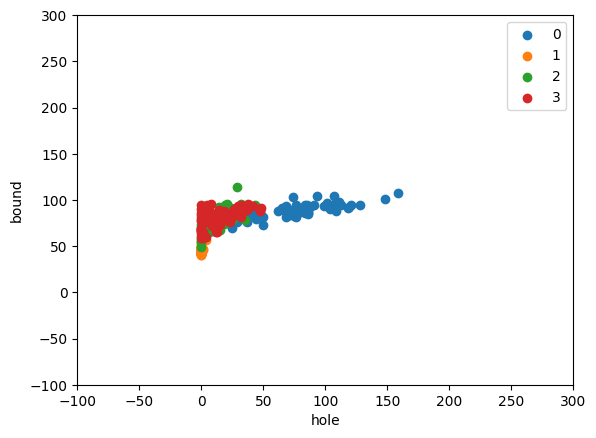

In [23]:
# feature extraction
train_hole = np.array([getHolePixels(i).sum() for i in train_X])
test_hole = np.array([getHolePixels(i).sum() for i in test_X])
train_bound = np.array([getBoundaryPixels(i).sum() for i in train_X])
test_bound = np.array([getBoundaryPixels(i).sum() for i in test_X])
# train_hull = np.array([getHullPixels(i).sum() for i in train_X])
# test_hull = np.array([getHullPixels(i).sum() for i in test_X])
# train_sum = np.sum(train_X, (1, 2)) / (28 * 28)
# test_sum = np.sum(test_X, (1, 2)) / (28 * 28)

# create the train and test set by combining the appropriate features
train_feats = np.vstack(
    (train_hole, train_bound)).transpose()
test_feats = np.vstack(
    (test_hole, test_bound)).transpose()

# fix limits of x and y axis so that we can see what is going on
xlim = [-100, 300]
ylim = [-100, 300]
fig, ax = plotData(train_feats, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

In [26]:
transform = np.array([[0.5, -1.5], [0.8, 2.5]])
print(transform)

train_feats_t = np.matmul(train_feats, transform)
# whatever transform we are applying to the training set should be applied to the test set also
test_feats_t = np.matmul(test_feats, transform)

[[ 0.5 -1.5]
 [ 0.8  2.5]]


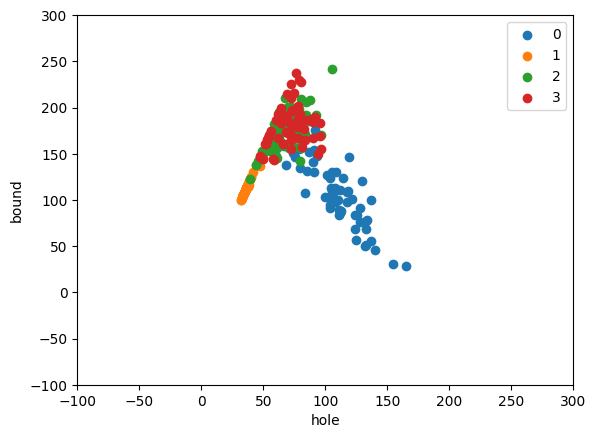

In [27]:
fig, ax = plotData(train_feats_t, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

In [29]:
test_pred = NN(train_feats_t, train_y, test_feats_t)
acc = Accuracy(test_y, test_pred)
print("Baseline accuracy:", acc*100, "%", "for", nclasses, "classes")

Baseline accuracy: 78.57142857142857 % for 4 classes


In [ ]:
2.answer

In [31]:
transforms = {
    "T0": np.array([[1, 0], [0, 3]]),
    "T1": np.array([[1, 0], [-1, 2]]),
    "T_custom": np.array([[0.5, -1.5], [0.8, 2.5]])
}

feature_sets = {
    "holes_bound": (train_feats, test_feats),
    "hull_sum": (
        np.stack([np.array([getHullPixels(i).sum() for i in train_X]),
                  np.sum(train_X, (1,2))],1),
        np.stack([np.array([getHullPixels(i).sum() for i in test_X]),
                  np.sum(test_X, (1,2))],1)
    )
}

for fname, (tr, te) in feature_sets.items():
    print("\nFeature set:", fname)
    for name, T in transforms.items():
        tr_t = tr @ T
        te_t = te @ T
        acc = Accuracy(test_y, NN(tr_t, train_y, te_t))
        print(f"  {name:10s} -> {acc*100:.2f}%")


Feature set: holes_bound
  T0         -> 80.95%
  T1         -> 80.95%
  T_custom   -> 78.57%

Feature set: hull_sum
  T0         -> 64.29%
  T1         -> 69.05%
  T_custom   -> 69.05%


In [ ]:
1. answer

In [32]:
transforms = {
    "emph_x": np.array([[2.0, 0.0], [0.0, 0.5]]),
    "emph_y": np.array([[0.5, 0.0], [0.0, 2.0]]),
    "mix":    np.array([[1.0, 1.0], [-1.0, 1.0]]),
    "rotation": np.array([[0.8, -0.6], [0.6, 0.8]]),
    "shear":  np.array([[1.0, 0.5], [0.0, 1.0]])
}

for name, T in transforms.items():
    train_t = train_feats @ T
    test_t  = test_feats  @ T
    pred = NN(train_t, train_y, test_t)
    acc = Accuracy(test_y, pred)
    print(f"{name:10s} acc: {acc*100:.2f}%")


emph_x     acc: 76.19%
emph_y     acc: 78.57%
mix        acc: 76.19%
rotation   acc: 73.81%
shear      acc: 73.81%


In [33]:
def rescale(data):
    return (data - data.min()) / (data.max() - data.min())

In [34]:
train_feats_rescaled_x = rescale(train_feats[:, 0])
train_feats_rescaled_y = rescale(train_feats[:, 1])
train_feats_rescaled = np.stack((train_feats_rescaled_x, train_feats_rescaled_y), 1)

test_feats_rescaled_x = rescale(test_feats[:, 0])
test_feats_rescaled_y = rescale(test_feats[:, 1])
test_feats_rescaled = np.stack((test_feats_rescaled_x, test_feats_rescaled_y), 1)

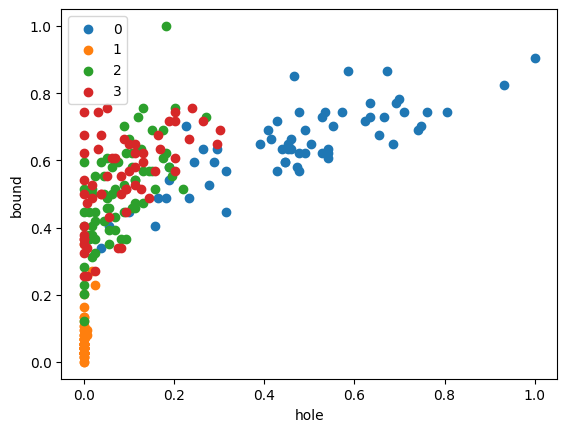

In [35]:
fig, ax = plotData(train_feats_rescaled, train_y)

In [36]:
test_pred = NN(train_feats_rescaled, train_y, test_feats_rescaled)
acc = Accuracy(test_y, test_pred)
print("Accuracy after transform:", acc*100, "%")

Accuracy after transform: 80.95238095238095 %


In [37]:
#Rescaling does two things: it subtracts the min (a shift) and then divides by range (a scale).
#The subtracting part moves the origin, so 0 doesn't map to 0 anymore.
#Matrix multiplication always maps the origin to the origin
#so it can do scaling but cannot do the translation step. Therefore rescaling is not a pure linear transform —
#it’s an affine transform (matrix × vector + offset).

Note about standardization (short):

Centering (x - μ) is translation → affine (not linear).
Scaling (x / σ) is linear (can be done with a diagonal matrix).
So standardization = centering (affine) then linear scaling

In [38]:
T = np.array([[2.0, 0.0],[0.0, 0.5]])
train_t = train_feats @ T
test_t  = test_feats  @ T
acc = Accuracy(test_y, NN(train_t, train_y, test_t))
print("acc:", acc)


acc: 0.7619047619047619


In [39]:
# rescale per feature using training mins/maxs
def rescale_featurewise(train, test):
    mins = train.min(axis=0)
    maxs = train.max(axis=0)
    train_r = (train - mins) / (maxs - mins + 1e-9)
    test_r  = (test  - mins) / (maxs - mins + 1e-9)
    return train_r, test_r

train_r, test_r = rescale_featurewise(train_feats, test_feats)
train_rt = train_r @ T
test_rt  = test_r  @ T
acc = Accuracy(test_y, NN(train_rt, train_y, test_rt))
print("rescale -> transform acc:", acc)


rescale -> transform acc: 0.7380952380952381


In [ ]:
3. Try other features: use hull + sum instead of holes + boundary
Why: different features capture different shape / intensity info.
hull measures filled area, sum measures darkness/ink density.
These might separate classes that holes and boundary don’t.
How: compute train_hull, train_sum, build train_feats2 = np.stack([train_hull, train_sum],1) and same for test. Then run the same experiments (baseline, transforms, normalization).
Expected: accuracy can improve for some digit pairs and worsen for others — pick features that capture the key differences between the chosen classes.

In [40]:
train_hull = np.array([getHullPixels(i).sum() for i in train_X])
test_hull  = np.array([getHullPixels(i).sum() for i in test_X])
train_sum  = np.sum(train_X, (1,2)) / (28*28)
test_sum   = np.sum(test_X, (1,2)) / (28*28)

train_feats2 = np.stack([train_hull, train_sum], 1)
test_feats2  = np.stack([test_hull,  test_sum], 1)

# baseline on new features
acc_baseline = Accuracy(test_y, NN(train_feats2, train_y, test_feats2))
print("hull+sum baseline:", acc_baseline)


hull+sum baseline: 0.6666666666666666


In [41]:
def zscore_train_test(train, test):
    mu = train.mean(axis=0)
    sigma = train.std(axis=0) + 1e-9
    return (train - mu)/sigma, (test - mu)/sigma

train_z, test_z = zscore_train_test(train_feats, test_feats)
acc_z = Accuracy(test_y, NN(train_z, train_y, test_z))
print("z-score acc:", acc_z)


z-score acc: 0.7857142857142857


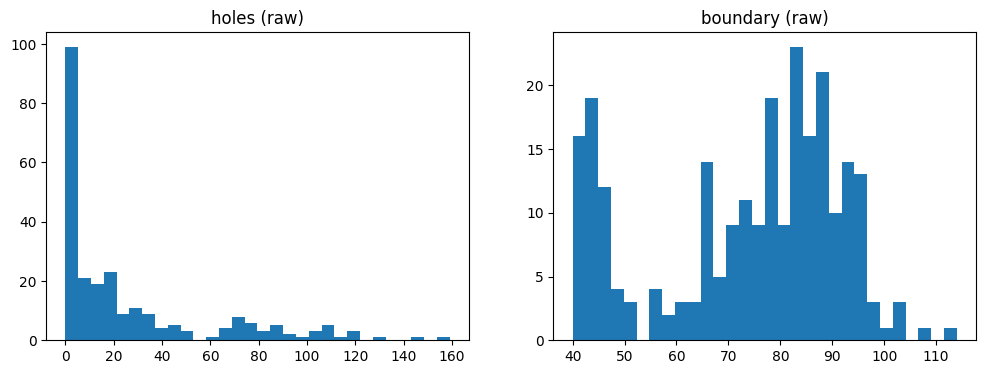

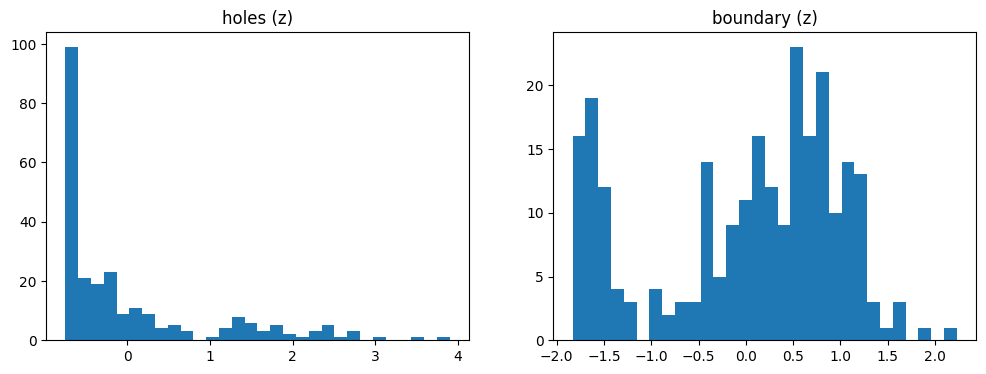

In [42]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.hist(train_feats[:,0], bins=30); plt.title("holes (raw)")
plt.subplot(1,2,2); plt.hist(train_feats[:,1], bins=30); plt.title("boundary (raw)")
plt.show()

# after z-score
plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.hist(train_z[:,0], bins=30); plt.title("holes (z)")
plt.subplot(1,2,2); plt.hist(train_z[:,1], bins=30); plt.title("boundary (z)")
plt.show()
